In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Sonar.csv')

In [3]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [4]:
df.corr()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
A1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
A2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
A3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
A4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
A5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
A6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
A7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
A8,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
A9,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
A10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


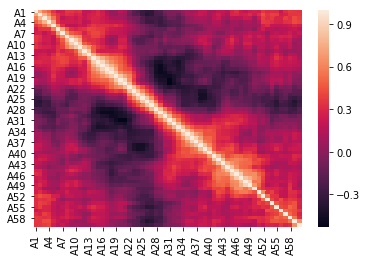

In [5]:
sns.heatmap(df.corr())

In [6]:
df.skew()

A1     2.131088
A2     2.155644
A3     2.652518
A4     3.401697
A5     2.018141
A6     1.248166
A7     0.970820
A8     1.481107
A9     1.633870
A10    1.281258
A11    0.987813
A12    0.588681
A13    0.736584
A14    1.022369
A15    0.763964
A16    0.694671
A17    0.654480
A18    0.525845
A19    0.283182
A20   -0.085331
A21   -0.252741
A22   -0.392289
A23   -0.594350
A24   -0.691861
A25   -0.788909
A26   -0.671580
A27   -0.627843
A28   -0.615447
A29   -0.442007
A30   -0.132390
A31    0.259797
A32    0.313420
A33    0.423864
A34    0.563296
A35    0.591654
A36    0.619868
A37    0.676994
A38    1.033366
A39    0.908835
A40    0.861280
A41    0.863526
A42    0.860110
A43    0.909317
A44    1.235086
A45    1.366839
A46    1.706674
A47    1.790155
A48    1.277722
A49    1.273385
A50    1.761714
A51    2.716060
A52    2.093976
A53    1.060572
A54    1.093090
A55    1.789946
A56    1.780805
A57    1.653090
A58    2.098330
A59    1.737506
A60    2.775754
dtype: float64

(array([56., 75., 41., 15.,  6.,  7.,  1.,  4.,  1.,  2.]),
 array([0.0015 , 0.01506, 0.02862, 0.04218, 0.05574, 0.0693 , 0.08286,
        0.09642, 0.10998, 0.12354, 0.1371 ]),
 <a list of 10 Patch objects>)

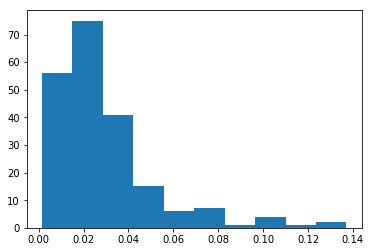

In [7]:
plt.hist(df['A1'])

(array([29., 64., 50., 34., 18.,  5.,  5.,  2.,  0.,  1.]),
 array([0.0102 , 0.04741, 0.08462, 0.12183, 0.15904, 0.19625, 0.23346,
        0.27067, 0.30788, 0.34509, 0.3823 ]),
 <a list of 10 Patch objects>)

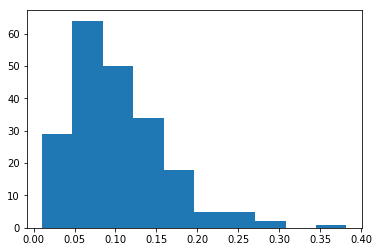

In [8]:
plt.hist(df['A6'])

In [9]:
df.isnull().sum()

A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
A16       0
A17       0
A18       0
A19       0
A20       0
A21       0
A22       0
A23       0
A24       0
A25       0
A26       0
A27       0
A28       0
A29       0
A30       0
         ..
A32       0
A33       0
A34       0
A35       0
A36       0
A37       0
A38       0
A39       0
A40       0
A41       0
A42       0
A43       0
A44       0
A45       0
A46       0
A47       0
A48       0
A49       0
A50       0
A51       0
A52       0
A53       0
A54       0
A55       0
A56       0
A57       0
A58       0
A59       0
A60       0
Target    0
Length: 61, dtype: int64

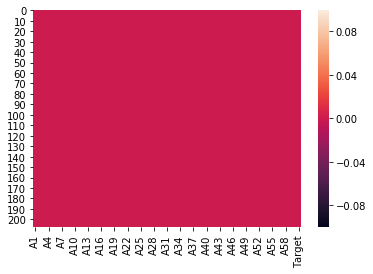

In [10]:
sns.heatmap(df.isnull())

# As there are NO Missing Values we will directly remove SKEWNESS & OUTLIERS from data

A1        AxesSubplot(0.125,0.816017;0.110714x0.0639831)
A2     AxesSubplot(0.257857,0.816017;0.110714x0.0639831)
A3     AxesSubplot(0.390714,0.816017;0.110714x0.0639831)
A4     AxesSubplot(0.523571,0.816017;0.110714x0.0639831)
A5     AxesSubplot(0.656429,0.816017;0.110714x0.0639831)
A6     AxesSubplot(0.789286,0.816017;0.110714x0.0639831)
A7        AxesSubplot(0.125,0.739237;0.110714x0.0639831)
A8     AxesSubplot(0.257857,0.739237;0.110714x0.0639831)
A9     AxesSubplot(0.390714,0.739237;0.110714x0.0639831)
A10    AxesSubplot(0.523571,0.739237;0.110714x0.0639831)
A11    AxesSubplot(0.656429,0.739237;0.110714x0.0639831)
A12    AxesSubplot(0.789286,0.739237;0.110714x0.0639831)
A13       AxesSubplot(0.125,0.662458;0.110714x0.0639831)
A14    AxesSubplot(0.257857,0.662458;0.110714x0.0639831)
A15    AxesSubplot(0.390714,0.662458;0.110714x0.0639831)
A16    AxesSubplot(0.523571,0.662458;0.110714x0.0639831)
A17    AxesSubplot(0.656429,0.662458;0.110714x0.0639831)
A18    AxesSubplot(0.789286,0.6

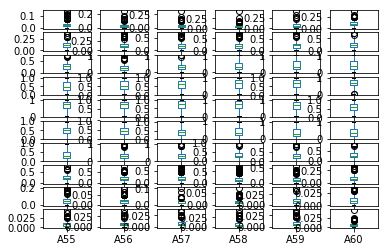

In [11]:
df.plot(kind='box',subplots=True,layout=(10,6))

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
df['Target']=le.fit_transform(df['Target'])

In [14]:
df['Target'].head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int32

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.39955135, 0.04064823, 0.02692565, ..., 0.17167808, 0.65894689,
        1.06973356],
       [0.70353822, 0.42163039, 1.05561832, ..., 0.44455424, 0.41985233,
        1.06973356],
       [0.12922901, 0.60106749, 1.72340448, ..., 0.25276128, 0.25758223,
        1.06973356],
       ...,
       [1.00438083, 0.16007801, 0.67384349, ..., 0.03913824, 0.67887143,
        0.93481221],
       [0.04953255, 0.09539176, 0.13480381, ..., 0.70402047, 0.34015415,
        0.93481221],
       [0.13794908, 0.06497869, 0.78861924, ..., 0.29860448, 0.99479044,
        0.93481221]])

In [16]:
threshold=3
print(np.where(z>3))

(array([  2,   2,   2,   2,   2,   3,   3,   5,   5,  19,  19,  20,  21,
        22,  22,  22,  22,  22,  22,  22,  22,  33,  44,  44,  44,  65,
        85,  85,  87,  91,  91,  97,  97,  98,  98,  98,  98,  98,  98,
       101, 101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129, 129,
       131, 132, 132, 133, 133, 133, 134, 134, 134, 134, 135, 135, 135,
       135, 136, 136, 136, 136, 137, 137, 138, 138, 138, 140, 140, 140,
       140, 140, 141, 141, 142, 142, 142, 143, 143, 143, 144, 145, 145,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147,
       147, 147, 147, 147, 161, 184, 186, 186, 186], dtype=int64), array([ 8,  9, 10, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41,
       46, 47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,
        1,  2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12,
       53,  0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,
        8, 51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 50, 4

In [17]:
z[2][8]

3.2327671116628496

In [18]:
df.skew()

A1        2.131088
A2        2.155644
A3        2.652518
A4        3.401697
A5        2.018141
A6        1.248166
A7        0.970820
A8        1.481107
A9        1.633870
A10       1.281258
A11       0.987813
A12       0.588681
A13       0.736584
A14       1.022369
A15       0.763964
A16       0.694671
A17       0.654480
A18       0.525845
A19       0.283182
A20      -0.085331
A21      -0.252741
A22      -0.392289
A23      -0.594350
A24      -0.691861
A25      -0.788909
A26      -0.671580
A27      -0.627843
A28      -0.615447
A29      -0.442007
A30      -0.132390
            ...   
A32       0.313420
A33       0.423864
A34       0.563296
A35       0.591654
A36       0.619868
A37       0.676994
A38       1.033366
A39       0.908835
A40       0.861280
A41       0.863526
A42       0.860110
A43       0.909317
A44       1.235086
A45       1.366839
A46       1.706674
A47       1.790155
A48       1.277722
A49       1.273385
A50       1.761714
A51       2.716060
A52       2.093976
A53       1.

In [19]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(168, 61)

In [20]:
df.shape

(208, 61)

In [21]:
df=df_new

In [22]:
x=df.iloc[:,0:-1]

In [23]:
y=df.iloc[:,-1]

In [24]:
x.shape

(168, 60)

In [25]:
y.shape

(168,)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=44)

In [27]:
x_train.shape

(117, 60)

In [28]:
x_test.shape

(51, 60)

In [29]:
y_train.shape

(117,)

In [30]:
y_test.shape

(51,)

In [31]:
Lg=LogisticRegression()
Gnb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()
DT=DecisionTreeClassifier()

In [32]:
Lg.fit(x_train,y_train)
Lg.predict(x_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1])

In [33]:
Gnb.fit(x_train,y_train)
Gnb.predict(x_test)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1])

In [35]:
svc.fit(x_train,y_train)
svc.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1])

In [36]:
knn.fit(x_train,y_train)
knn.predict(x_test)

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0])

In [37]:
DT.fit(x_train,y_train)
DT.predict(x_test)

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0])

In [38]:
accuracy_score(y_test,Lg.predict(x_test))

0.7450980392156863

In [39]:
accuracy_score(y_test,knn.predict(x_test))

0.7647058823529411

In [40]:
accuracy_score(y_test,svc.predict(x_test))

0.5098039215686274

In [41]:
accuracy_score(y_test,Gnb.predict(x_test))

0.6862745098039216

In [42]:
accuracy_score(y_test,DT.predict(x_test))

0.7647058823529411

# Therefore best suitable algorithms are KNN and Decision Tree